# Data Science IGaming Project.

### _"Data Analysis of Video Game Sales from years 1980  to 2020."_

## Table of Contents

* ### Part 1: Introduction
* ### Part 2: Import, Settings, Load Data
* ### Part 3: Exploratory Data Analysis
* ### Part 4: Conclusions


## Part 1: Introduction
### Overview
    To complete my Data Analysis project I will be using a dataset about Video Games Sales from years 1980 to 2020.

    This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of vgchartz.com. The script to scrape the data is available at https://github.com/GregorUT/vgchartzScrape. It is based on BeautifulSoup using Python. There are 16,598 records.
    
    In this dataset there are 11 columns. Their names and data types as follows:

* Rank - Ranking of overall sales

* Name - The games name

* Platform - Platform of the games release (i.e. PC,PS4, etc.)

* Year - Year of the game's release

* Genre - Genre of the game

* Publisher - Publisher of the game

* NA_Sales - Sales in North America (in millions of units)

* EU_Sales - Sales in Europe (in millions of units)

* JP_Sales - Sales in Japan (in millions of units)

* Other_Sales - Sales in the rest of the world (in millions of units)

* Global_Sales - Total worldwide sales (in millions of units)


### Assumptions
    In this dataset let's use UNIT = American dollars. 
    So that 'in millions of units' = 'in millions of $'.


### Questions:

* #### Question 1: Games which had the most and least sales in European Union.
* #### Question 2: Games which had generated the highest revenue.
* #### Question 3: Top 5 games which generated the highest revenue in 2016.
* #### Question 4: Number of game sales in millions of dollars per year.
* #### Question 5: Top 10 games by revenue generated in millions of dollars.
* #### Question 6: Number of game releases per year.
* #### Question 7: Top 10 total platform games released.
* #### Question 8: Genres by total revenue generated in millions of dollars.
* #### Question 9: Platform vs Genre.
* #### Question 10: Top 10 total publisher games released.
* #### Question 11: Top 10 total publisher games revenue.
* #### Question 12: Top 3 publishers by revenue per region.
* #### Question 13: Top 3 platforms by revenue per region.
* #### Question 14: Top 3 years by revenue per region.
* #### Question 15: Top 3 genres by revenue per region.
* #### Question 16: Top 3 games by revenue per region.
* #### Question 17: Total revenue generated in millions of dollars by region.

## Part 2: Import, Load Data

* ### Import 

In [35]:
# import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

* ### Read data from ‘dataset.csv’ file

In [36]:
# read data from 'vgsales.csv' file and store it as 'df'
df = pd.read_csv('vgsales.csv')

## Part 3: Exploratory Data Analysis

* ### Head and Tail

In [37]:
# preview of the first 5 lines of the loaded data 
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [38]:
# preview of the last 3 lines of the loaded data 
df.tail(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


* ### Shape, Info, duplicates

In [39]:
# print the dimensions of the dataset
df.shape

(16598, 11)

In [40]:
# print the full summary of the dataset  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


In [41]:
# check for duplicates 
sum(df.duplicated())

0

Dataset consists of 16598 rows and 11 columns; 

has 3 datatypes: float64(6), int64(1), object(4);

2 features have missing values (such as 'Year' and 'Publisher');

no duplicates.

* ### Missing Data

In [42]:
# columns which have missing values 
na_columns = [i for i in df.columns if df[i].isnull().any()]
print(df.isnull().sum())
print("There are " + str(len(na_columns)) +" columns with N/A values for 16598 rows.")
na_columns


Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
There are 2 columns with N/A values for 16598 rows.


['Year', 'Publisher']

 * #### Filling missing values

Field 'Year' is a Numerical feature, therefore, N/A values will be replaced with 'mean'. Field 'Publisher' is a Categorical feature, therefore, N/A values will be replaced with string 'None'.

In [43]:
# N/A columns to fill in 'Year'
na_columns_fill = ['Year']
df.fillna(df.mean(), inplace = True)

In [44]:
# N/A columns to fill in 'Publisher'
na_columns_fill = ['Publisher']
for col in na_columns_fill:
    df[col].fillna('None',inplace=True)

In [45]:
# print the full summary of the dataset after filling missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
Rank            16598 non-null int64
Name            16598 non-null object
Platform        16598 non-null object
Year            16598 non-null float64
Genre           16598 non-null object
Publisher       16598 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB


The above list shows no new Missing data therefore this is complete.

* ### Changing format of 'Year' column.
    
    'Year' column must show us a Date as an integer data type, but instead it showed as a float. 
    It needs to be changed.

In [46]:
change_type=['Year']

# change of data type
df[change_type]=df[change_type].applymap(np.int64)

# print data types of the dataset to see the changed info
df.dtypes

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [47]:
# check 'Year' format again
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


* ### Numerical and Categorical features
* #### List of Numerical and Categorical features

In [48]:
# check for Numerical and Categorical features
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print ('Quantity of Numerical features: ', len(numerical_feats))
print ()
print (df[numerical_feats].columns)
print ()
categorical_feats = df.dtypes[df.dtypes == 'object'].index
print ('Quantity of Categorical features: ', len(categorical_feats))
print ()
print (df[categorical_feats].columns)

Quantity of Numerical features:  7

Index(['Rank', 'Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Global_Sales'],
      dtype='object')

Quantity of Categorical features:  4

Index(['Name', 'Platform', 'Genre', 'Publisher'], dtype='object')


Below I check the number of unique games (rows), publishers, platforms and genres to get an idea of how the games in the dataset are distributed categorically.

In [49]:
names = df['Name'].unique()
print("Number of games: ", len(names))

publishers = df['Publisher'].unique()
print("Number of publishers: ", len(publishers))

platforms = df['Platform'].unique()
print("Number of platforms: ", len(platforms))

genres = df['Genre'].unique()
print("Number of genres: ", len(genres))

Number of games:  11493
Number of publishers:  579
Number of platforms:  31
Number of genres:  12


### Question 1: Games which had most and least sales in European Union.

In [50]:
# defining the function
def calculate(column):
    
    # for highest value
    high= df[column].idxmax()
    high_val=pd.DataFrame(df.loc[high])
    
    # for lowest value
    low= df[column].idxmin()
    low_val=pd.DataFrame(df.loc[low])
    
    # collecting data in one place
    info=pd.concat([high_val, low_val], axis=1)
    
    return info

# calling the function
calculate('EU_Sales')

,0,147
Rank,1,148
Name,Wii Sports,Final Fantasy XII
Platform,Wii,PS2
Year,2006,2006
Genre,Sports,Role-Playing
Publisher,Nintendo,Square Enix
NA_Sales,41.49,1.88
EU_Sales,29.02,0
JP_Sales,3.77,2.33
Other_Sales,8.46,1.74


### Answer  1:

The entity with id number 0 named 'Wii Sports' shows the largest sales with a total of 29.02 millions dollars.

Whereas the entity with id number 147 named 'Final Fantasy XII' have the lowest sales with total 0 dollars.



### Question 2: Games which had generated the highest revenue.

In [51]:
def top(df, n = 1, column = 'Global_Sales'):
    return df.sort_values(by=column)[-n:]
df.groupby(['Year'], group_keys=False).apply(top)[['Year', 'Name','Global_Sales' ]]


,Year,Name,Global_Sales
258,1980,Asteroids,4.31
239,1981,Pitfall!,4.50
89,1982,Pac-Man,7.81
421,1983,Baseball,3.20
9,1984,Duck Hunt,28.31
1,1985,Super Mario Bros.,40.24
127,1986,The Legend of Zelda,6.51
251,1987,Zelda II: The Adventure of Link,4.38
22,1988,Super Mario Bros. 3,17.28
5,1989,Tetris,30.26


### Answer  2: 

The table above shows which game with which rank has the highest global sales (number in millions of dollars) from year 1981 to 2020.

### Question 3: Top 5 games which generated the highest revenue in 2016.

In [52]:
# selecting the games having revenue in 2016
high_rev_data = df[df['Year'] == 2016]

# reindexing new data
high_rev_data.index = range(len(high_rev_data))

# we will start from 1 instead of 0
high_rev_data.index = high_rev_data.index + 1

# printing the changed dataset
high_rev_data.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,222,FIFA 17,PS4,2016,Sports,Electronic Arts,0.28,3.75,0.06,0.69,4.77
2,272,Uncharted 4: A Thief's End,PS4,2016,Shooter,Sony Computer Entertainment,1.30,2.07,0.18,0.65,4.20
3,352,Tom Clancy's The Division,PS4,2016,Shooter,Ubisoft,1.28,1.61,0.15,0.57,3.61
4,772,Far Cry: Primal,PS4,2016,Action,Ubisoft,0.59,1.16,0.06,0.33,2.13
5,847,Tom Clancy's The Division,XOne,2016,Shooter,Ubisoft,1.20,0.62,0.00,0.18,2.01


### Answer 3:

The games named:
* 'FIFA 17' 
* 'Uncharted 4: A Thief's End'
* 'Tom Clancy's The Division' (PS4 plarform)
* 'Far Cry: Primal'
* 'Tom Clancy's The Division' (XOne platform)

shows the largest sales in 2016.

### Question 4: Number of game sales in millions of dollars per year.

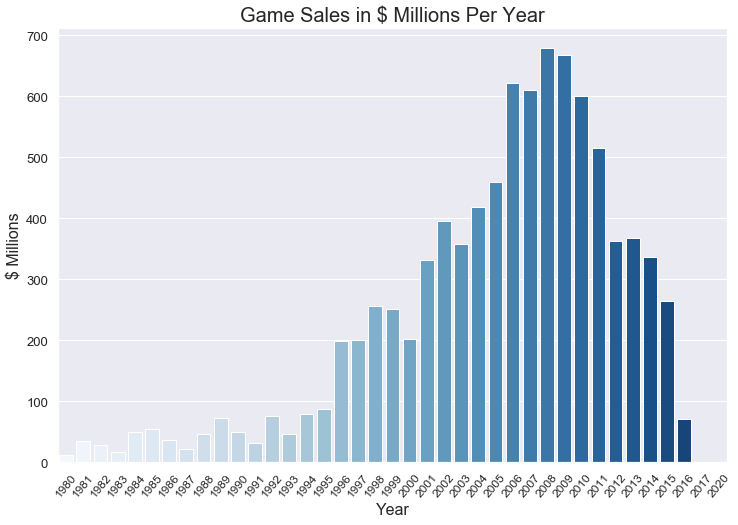

In [53]:
y = df.groupby(['Year']).sum()
y = y['Global_Sales']
x = y.index.astype(int)

# visualisation
plt.figure(figsize=(12,8))
ax = sns.barplot(y = y, x = x, palette = 'Blues')
ax.set_xlabel(xlabel='Year', fontsize=16)
ax.set_xticklabels(labels = x, fontsize=12, rotation=50)
ax.set_ylabel(ylabel='$ Millions', fontsize=16)
ax.set_title(label='Game Sales in $ Millions Per Year', fontsize=20)
plt.show();

### Answer  4: 

The plot above shows how much games sales in millions of dollars was done each year from 1981 to 2020.

### Question 5: Top 10 games by revenue generated in millions of dollars.

In [54]:
data = df.groupby(['Name']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
name = data.index
name


Index(['Wii Sports', 'Grand Theft Auto V', 'Super Mario Bros.', 'Tetris',
       'Mario Kart Wii', 'Wii Sports Resort', 'Pokemon Red/Pokemon Blue',
       'Call of Duty: Black Ops', 'Call of Duty: Modern Warfare 3',
       'New Super Mario Bros.'],
      dtype='object', name='Name')

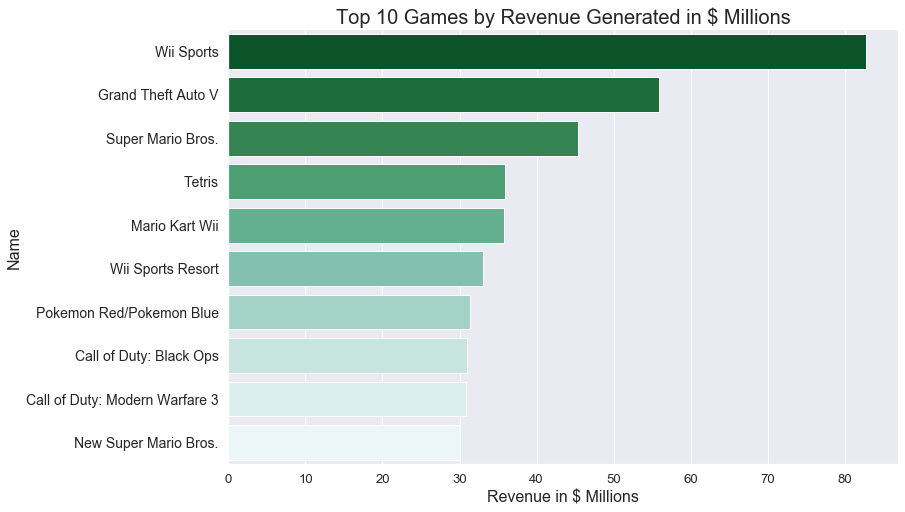

In [55]:
# visualisation
plt.figure(figsize=(12,8))
colors = sns.color_palette("gist_earth", len(data))
ax = sns.barplot(y = name, x = 'Global_Sales', data=data, orient='h', palette='BuGn_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Name', fontsize=16)
ax.set_title(label='Top 10 Games by Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = name, fontsize=14)
plt.show();

### Answer  5: 
Top 10 games by revenue generated in millions of dollars:

* 1. 'Wii Sports'
* 2. 'Grand Theft Auto V' 
* 3. 'Super Mario Bros.' 
* 4. 'Tetris'
* 5. 'Mario Kart Wii'
* 6. 'Wii Sports Resort'
* 7. 'Pokemon Red/Pokemon Blue'
* 8. 'Call of Duty: Black Ops', 'Call of Duty: Modern Warfare 3'
* 9. 'New Super Mario Bros.'
* 10. 'Call of Duty: Black Ops II'

### Question 6:  Number of game releases per year.

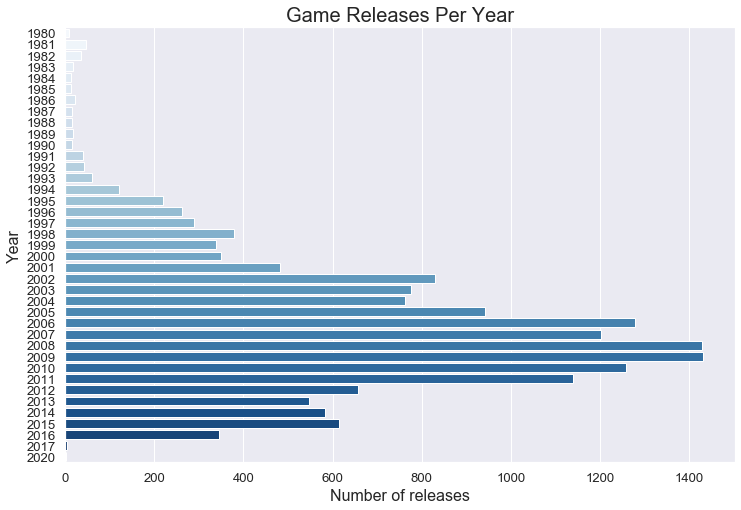

In [56]:
x = df.groupby(['Year']).count()
x = x['Global_Sales']
y = x.index.astype(int)

# visualisation
plt.figure(figsize=(12,8))
colors = sns.color_palette()
ax = sns.barplot(y = y, x = x, orient='h', palette='Blues')
ax.set_xlabel(xlabel='Number of releases', fontsize=16)
ax.set_ylabel(ylabel='Year', fontsize=16)
ax.set_title(label='Game Releases Per Year', fontsize=20)
plt.show();

### Answer  6: 

The plot above shows how many games were released each year from 1981 to 2020. As depicted, the highest numbers of releases were in 2008 and 2009 with more than 1400 releases each.

### Question 7: Top 10 total platform games released.

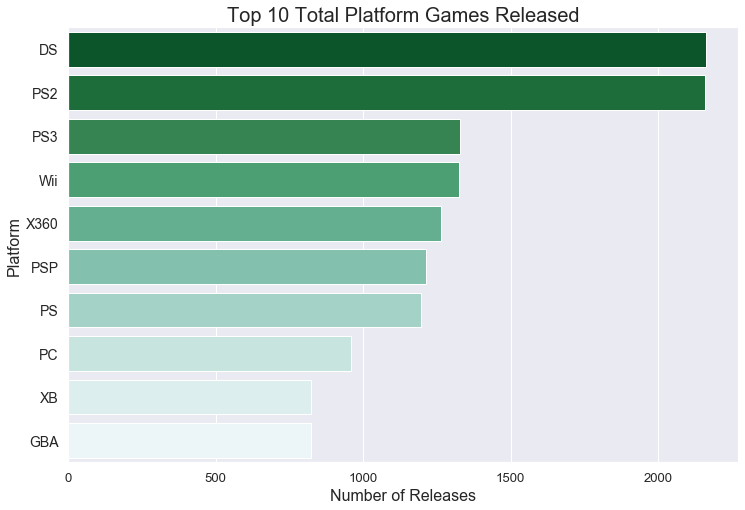

In [57]:
data = df.groupby(['Platform']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
platforms = data.index
data.columns = ['Releases']

# visualisation
colors = sns.color_palette("gist_earth", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = platforms , x = 'Releases', data=data, orient='h', palette='BuGn_r')
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Platform', fontsize=16)
ax.set_title(label='Top 10 Total Platform Games Released', fontsize=20)
ax.set_yticklabels(labels = platforms, fontsize=14)
plt.show();

### Answer  7: 
The plot above depicts that 'DS' and 'PS2' have the most games in their platform with more than 2000 releases each.

### Question 8: Genres by total revenue generated in millions of dollars.

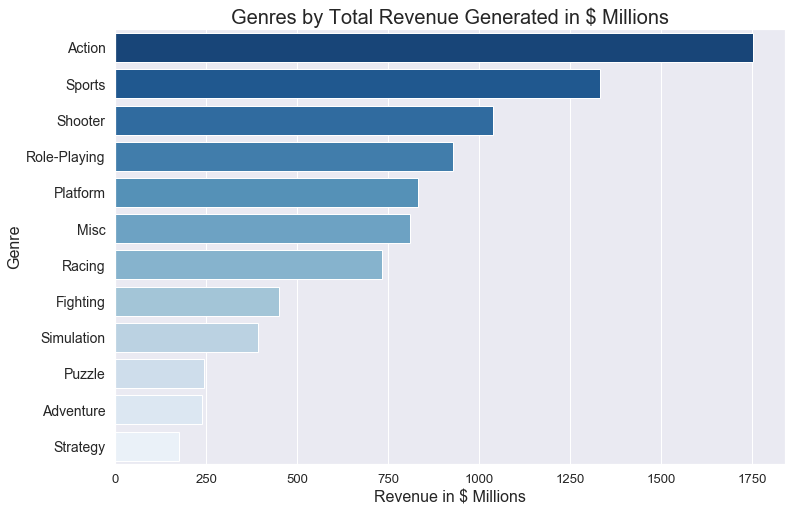

In [58]:
rev = df.groupby(['Genre']).sum()['Global_Sales']
rev = pd.DataFrame(rev.sort_values(ascending=False))
genres = rev.index
rev.columns = ['Revenue']

# visualisation
colors = sns.color_palette("gist_earth", len(rev))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = genres , x = 'Revenue', data=rev, orient='h', palette='Blues_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Genre', fontsize=16)
ax.set_title(label='Genres by Total Revenue Generated in $ Millions', fontsize=20)
ax.set_yticklabels(labels = genres, fontsize=14)
plt.show();

### Answer  8: 

The plot above shows a total revenue in millions of dollars generated, by game genres. Plot shows that the 'Action' game genre has the highest revenue with more than 1 billion and 750 millions dollars in total.

### Question 9: Platform vs Genre.

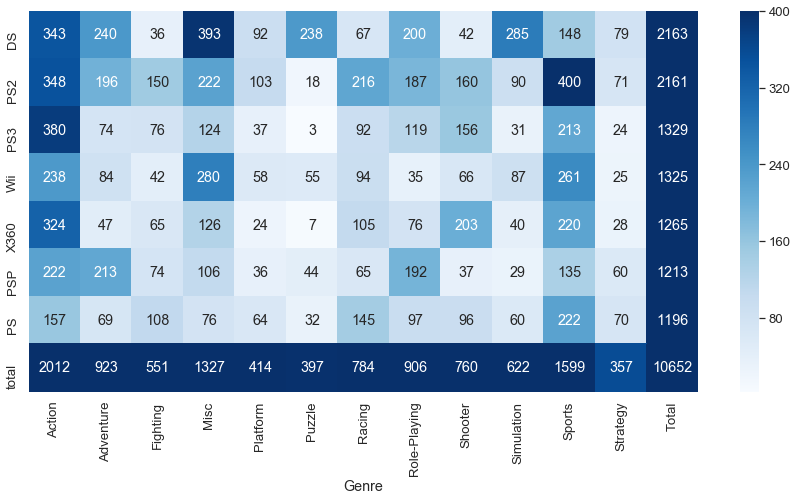

In [59]:
# correlation matrix between Platform and Genre
platfGenre = pd.crosstab(df.Platform, df.Genre)
platfGenreTotal = platfGenre.sum(axis=1).sort_values(ascending = False)

# visualisation
platfGenre['Total'] = platfGenre.sum(axis=1)
popPlatform = platfGenre[platfGenre['Total']>1000].sort_values(by='Total', ascending = False)
neededdata = popPlatform.loc[:,:'Strategy']
maxi = neededdata.values.max()
mini = neededdata.values.min()
popPlatformfinal = popPlatform.append(pd.DataFrame(popPlatform.sum(), columns=['total']).T, ignore_index=False)
sns.set(font_scale=1.2)
plt.figure(figsize=(15,7))
sns.heatmap(popPlatformfinal, vmin = mini, vmax = maxi, annot=True, fmt="d", cmap = 'Blues')
plt.xticks(rotation = 90)
plt.show()

### Answer  9: 

The heatmap above shows the relation between Platform and Genre; the details of genre of game in platform that have more than 1000 games. As can be seen, the popular genre of games of 'DS' platform is 'Misc', 'PS2' platform is 'Sports' and 'PS3' platform is 'Action'.

### Question 10: Top 10 total publisher games released.

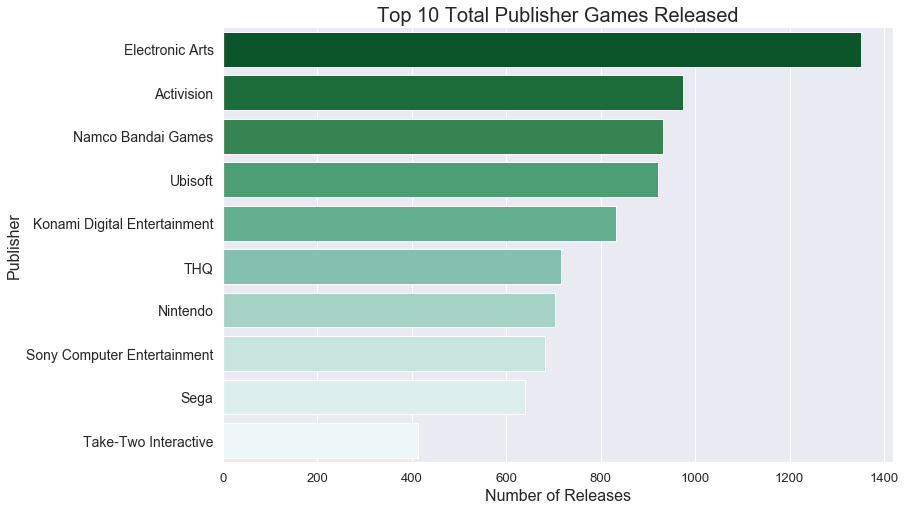

In [60]:
data = df.groupby(['Publisher']).count().iloc[:,0]
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Releases']

# visualisation
colors = sns.color_palette("gist_earth", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Releases', data=data, orient='h',  palette='BuGn_r')
ax.set_xlabel(xlabel='Number of Releases', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Games Released', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();


### Answer  10: 
The plot above depicts that publisher 'Electronic Arts' have the highest number of games releases from 'Top 10 publishers' with more than 1300 releases.

### Question 11: Top 10 total publisher games revenue.

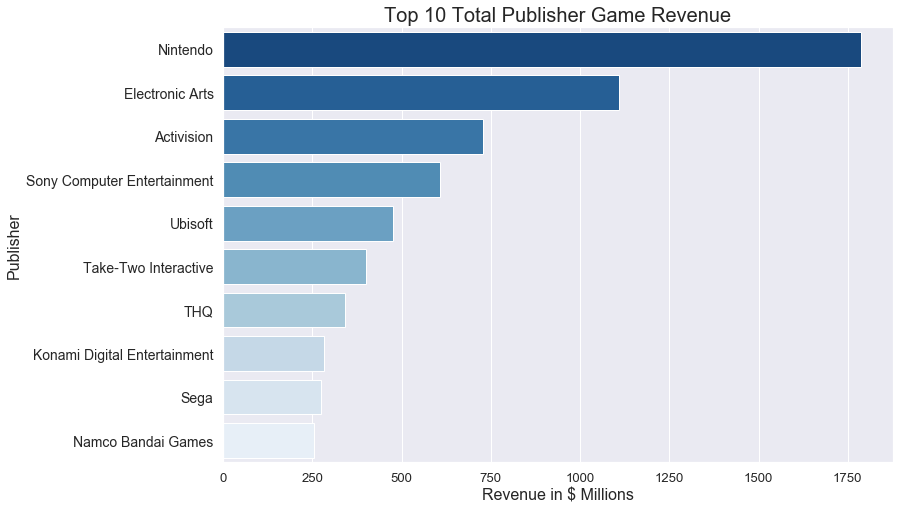

In [61]:
data = df.groupby(['Publisher']).sum()['Global_Sales']
data = pd.DataFrame(data.sort_values(ascending=False))[0:10]
publishers = data.index
data.columns = ['Global Sales']

# visualisation
colors = sns.color_palette("gist_earth", len(data))
plt.figure(figsize=(12,8))
ax = sns.barplot(y = publishers , x = 'Global Sales', data=data, orient='h', palette='Blues_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Publisher', fontsize=16)
ax.set_title(label='Top 10 Total Publisher Game Revenue', fontsize=20)
ax.set_yticklabels(labels = publishers, fontsize=14)
plt.show();

### Answer  11: 
The plot above depicts that publisher 'Nintendo' have the highest revenue from 'Top 10 game publishers' with more than 1 billion and 750 millions of dollars in total.

### Question 12: Top 3 publishers by revenue per region.

In [62]:
def turn_off_labels(ax, first=True):
    if first == False:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)
        y_axis = ax.axes.get_yaxis()
        y_axis.set_visible(False)
    else:
        x_axis = ax.axes.get_xaxis()
        x_label = x_axis.get_label()
        x_label.set_visible(False)

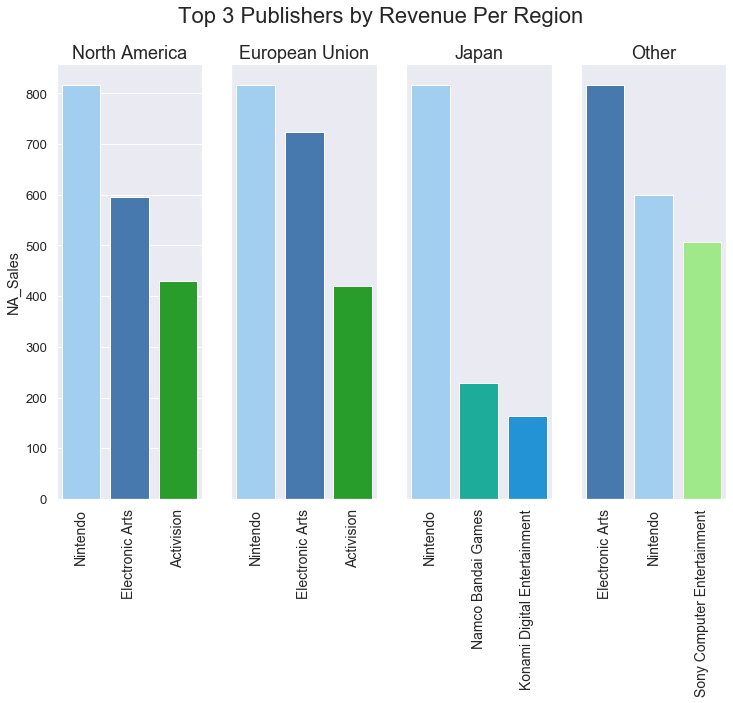

In [63]:
NA = df.pivot_table('NA_Sales', columns='Publisher', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_publishers = NA.index

EU = df.pivot_table('EU_Sales', columns='Publisher', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_publishers = EU.index

JP = df.pivot_table('JP_Sales', columns='Publisher', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_publishers = JP.index

Other = df.pivot_table('Other_Sales', columns='Publisher', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_publishers = Other.index

colors =  {'Nintendo':sns.xkcd_rgb["light blue"], 'Electronic Arts':sns.xkcd_rgb["windows blue"], 'Activision':sns.xkcd_rgb["green"], 'Namco Bandai Games':sns.xkcd_rgb["turquoise"], 'Konami Digital Entertainment':sns.xkcd_rgb["azure"], 'Sony Computer Entertainment':sns.xkcd_rgb["light green"]}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = NA_publishers, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_publishers, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = EU_publishers, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_publishers, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = JP_publishers, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_publishers, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_publishers, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_publishers, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Publishers by Revenue Per Region', size=22)
plt.show();

### Answer  12: 

The pivot tables above present the top 3 publishers of games by their sales per 4 different regions: North America, European Union, Japan and Other Sales.

### Question 13: Top 3 platforms by revenue per region.

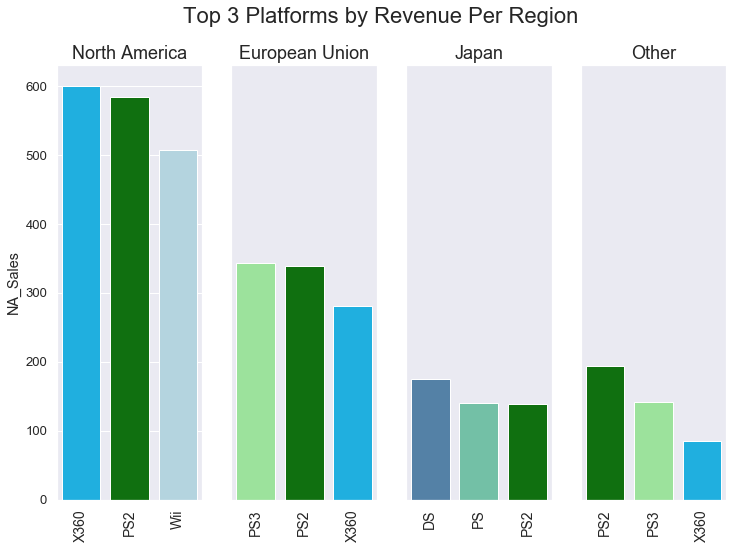

In [64]:
NA = df.pivot_table('NA_Sales', columns='Platform', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_platforms = NA.index

EU = df.pivot_table('EU_Sales', columns='Platform', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_platforms = EU.index

JP = df.pivot_table('JP_Sales', columns='Platform', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_platforms = JP.index

Other = df.pivot_table('Other_Sales', columns='Platform', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_platforms = Other.index

colors =  {'PS':"mediumaquamarine", 'PS2':"green", 'PS3':"lightgreen", 'DS':"steelblue", 'X360':"deepskyblue", 'Wii':"lightblue"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = NA_platforms, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_platforms, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2, sharey=ax1)
ax2.set_xticklabels(labels = EU_platforms, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_platforms, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)

ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = JP_platforms, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_platforms, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_platforms, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_platforms, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Platforms by Revenue Per Region', size=22)
plt.show();

### Answer  13: 

The pivot tables above present the top 3 platforms of games by their sales per 4 different regions: North America, European Union, Japan and Other Sales.

### Question 14: Top 3 years by revenue per region.

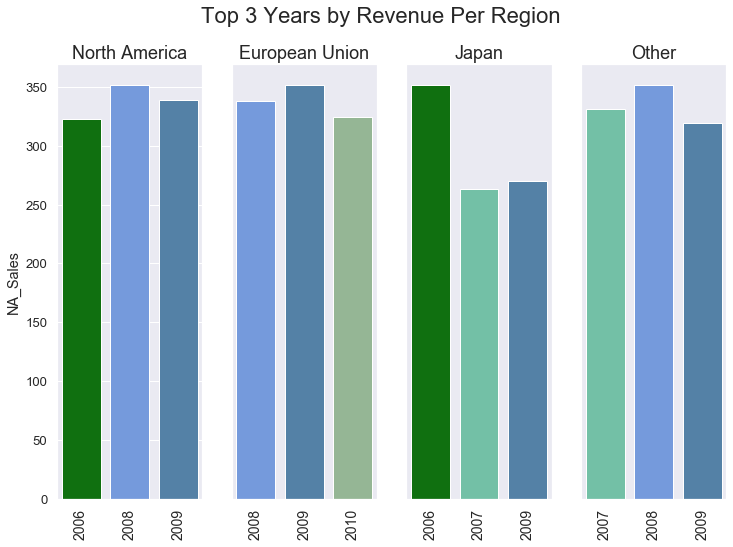

In [65]:
NA = df.pivot_table('NA_Sales', columns='Year', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_years = NA.index.astype(int)

EU = df.pivot_table('EU_Sales', columns='Year', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_years = EU.index.astype(int)

JP = df.pivot_table('JP_Sales', columns='Year', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_years = JP.index.astype(int)

Other = df.pivot_table('Other_Sales', columns='Year', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_years = Other.index.astype(int)

colors =  {2006.0:"green", 2007.0:"mediumaquamarine", 2008.0:"cornflowerblue", 2009.0:"steelblue", 2010.0:"darkseagreen"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = NA_years, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_years, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = EU_years, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_years, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = JP_years, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_years, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other.index, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_years, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Years by Revenue Per Region', size=22)
plt.show();

### Answer  14: 

The pivot tables above present the top 3 years of games sales per 4 different regions: North America, European Union, Japan and Other Sales.

### Question 15: Top 3 genres by revenue per region.

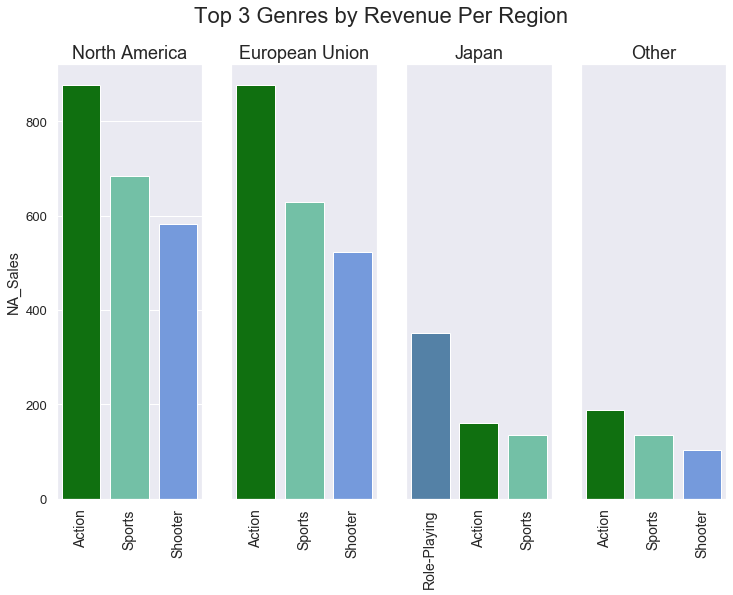

In [66]:

NA = df.pivot_table('NA_Sales', columns='Genre', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_genres = NA.index

EU = df.pivot_table('EU_Sales', columns='Genre', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_genres = EU.index

JP = df.pivot_table('JP_Sales', columns='Genre', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_genres = JP.index

Other = df.pivot_table('Other_Sales', columns='Genre', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_genres = Other.index

colors =  {'Action':"green", 'Sports':"mediumaquamarine", 'Shooter':"cornflowerblue", 'Role-Playing':"steelblue"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1, sharey=ax1)
ax1.set_xticklabels(labels = NA_genres, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_genres, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = EU_genres, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_genres, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)


ax3 = fig.add_subplot(1,4,3, sharey=ax1)
ax3.set_xticklabels(labels = JP_genres, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_genres, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4, sharey=ax1)
ax4.set_xticklabels(labels = Other_genres, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_genres, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)

plt.suptitle('Top 3 Genres by Revenue Per Region', size=22)
plt.show();


### Answer  15: 

The pivot tables below present the top 3 genres of games by their sales per 4 different regions: North America, European Union, Japan and Other Sales.

### Question 16: Top 3 games by revenue per region.

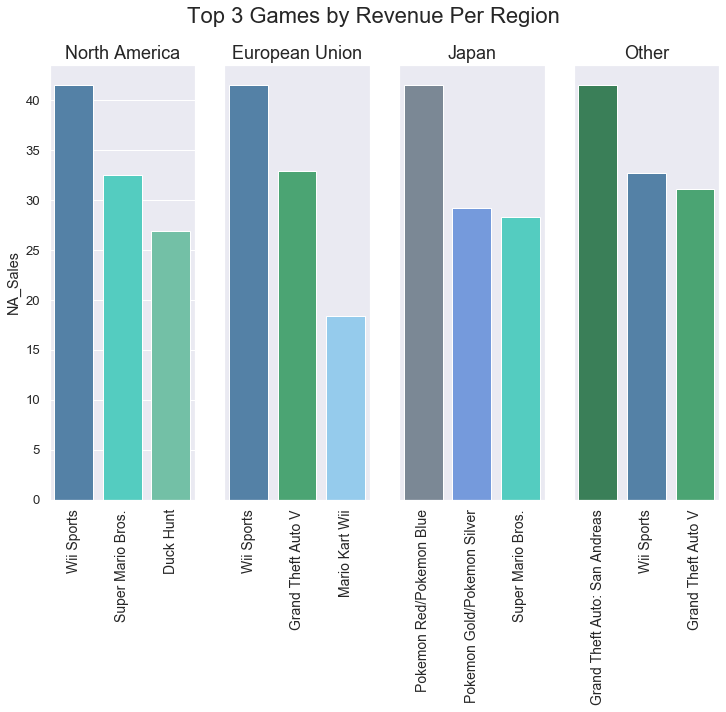

In [67]:
NA = df.pivot_table('NA_Sales', columns='Name', aggfunc='sum').T
NA = NA.sort_values(by='NA_Sales', ascending=False).iloc[0:3]
NA_games = NA.index

EU = df.pivot_table('EU_Sales', columns='Name', aggfunc='sum').T
EU = EU.sort_values(by='EU_Sales', ascending=False).iloc[0:3]
EU_games = EU.index

JP = df.pivot_table('JP_Sales', columns='Name', aggfunc='sum').T
JP = JP.sort_values(by='JP_Sales', ascending=False).iloc[0:3]
JP_games = JP.index

Other = df.pivot_table('Other_Sales', columns='Name', aggfunc='sum').T
Other = Other.sort_values(by='Other_Sales', ascending=False).iloc[0:3]
Other_games = Other.index

colors =  {'Wii Sports':"steelblue", 'Grand Theft Auto V':"mediumseagreen", 'Mario Kart Wii':"lightskyblue", 'Pokemon Red/Pokemon Blue':"lightslategray", 'Pokemon Gold/Pokemon Silver':"cornflowerblue", 'Super Mario Bros.':"turquoise", 'Duck Hunt':"mediumaquamarine", 'Grand Theft Auto: San Andreas':"seagreen"}
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(1,4,1)
ax1.set_xticklabels(labels = NA_games, rotation=90, size=14)
turn_off_labels(ax1)
sns.barplot(x=NA_games, y=NA['NA_Sales'], palette=colors)
plt.title('North America', size=18)

ax2 = fig.add_subplot(1,4,2)
ax2.set_xticklabels(labels = EU_games, rotation=90, size=14)
turn_off_labels(ax2, first=False)
sns.barplot(x=EU_games, y=EU['EU_Sales'], palette=colors)
plt.title('European Union', size=18)

ax3 = fig.add_subplot(1,4,3)
ax3.set_xticklabels(labels = JP_games, rotation=90, size=14)
turn_off_labels(ax3, first=False)
sns.barplot(x=JP_games, y=JP['JP_Sales'], palette=colors)
plt.title('Japan', size=18)

ax4 = fig.add_subplot(1,4,4)
ax4.set_xticklabels(labels = Other_games, rotation=90, size=14)
turn_off_labels(ax4, first=False)
sns.barplot(x=Other_games, y=Other['Other_Sales'], palette=colors)
plt.title('Other', size=18)
plt.suptitle('Top 3 Games by Revenue Per Region', size=22)
plt.show();

### Answer  16: 

The pivot tables below present the top 3 games with a highest revenue per 4 different regions: North America, European Union, Japan and Other Sales.

### Question 17: Total revenue generated in millions of dollars by region.

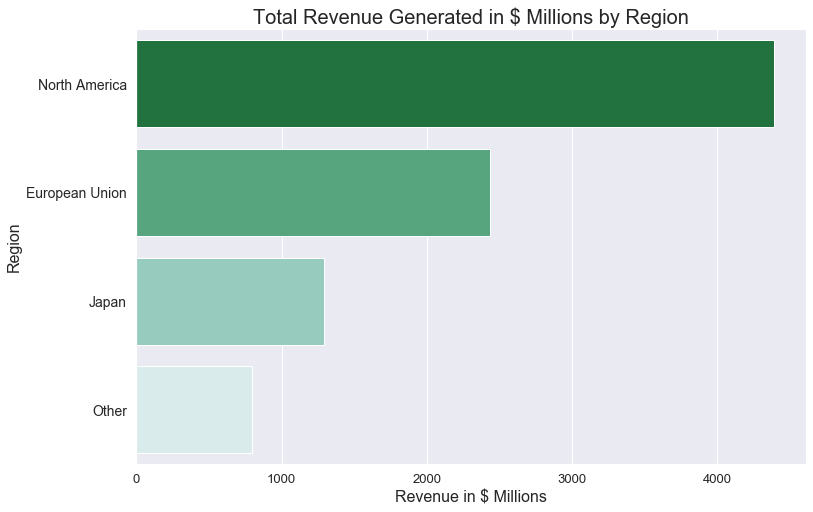

In [68]:
data = df.sum()
data = pd.DataFrame([ data['NA_Sales'], data['EU_Sales'], data['JP_Sales'], data['Other_Sales']])
regions = ['North America','European Union', 'Japan', 'Other']
data.index = regions
data.columns = ['Revenue']
data = data.sort_values(by='Revenue', ascending=False)

# visualisation
plt.figure(figsize=(12,8))
colors = sns.color_palette("gist_earth", len(data))
ax = sns.barplot(y = regions , x = 'Revenue', data=data, orient='h', palette='BuGn_r')
ax.set_xlabel(xlabel='Revenue in $ Millions', fontsize=16)
ax.set_ylabel(ylabel='Region', fontsize=16)
ax.set_title(label='Total Revenue Generated in $ Millions by Region', fontsize=20)
ax.set_yticklabels(labels = regions, fontsize=14)
plt.show();

### Answer  17: 

The plot above shows the revenue generated by the four regions that the "Global_Sales" column is made up of: North America, European Union, Japan and Other.


## Part 4: Conclusions

After this data analysis of video game sales from years 1980 to 2020, here are some additional final results:


* #### Top 1 game by revenue Global: 'Wii Sports'
* Top 1 game by revenue for North America region: 'Wii Sports'
* Top 1 game by revenue for Eurepean Union region: 'Wii Sports'  
* Top 1 game by revenue for Japan region: 'Pokemon Red/Pokemon Blue'
* Top 1 game by revenue for Other regions: 'Grand Theft Auto: San Andreas'


* #### Top 1 platform by revenue Global: 'DS'
* Top 1 platform by revenue for North America region: 'X360'
* Top 1 platform by revenue for Eurepean Union region: 'PS3'  
* Top 1 platform by revenue for Japan region: 'DS'
* Top 1 platform by revenue for Other regions: 'PS2'


* #### Top 1 year of the game released Global: 2008
* Top 1 year of the game released for North America region: 2008
* Top 1 year of the game released for Eurepean Union region: 2009  
* Top 1 year of the game released for Japan region: 2007
* Top 1 year of the game released for Other regions: 2008
  
  
* #### Top 1 genre by revenue Global: 'Action'
* Top 1 genre by revenue for North America region: 'Action'
* Top 1 genre by revenue for Eurepean Union region: 'Action'  
* Top 1 genre by revenue for Japan region: 'Action'
* Top 1 genre by revenue for Other regions: 'Role-Playing'
    

* #### Top 1 publisher by revenue Global: 'Nintendo'
* Top 1 publisher by revenue for North America region: 'Nintendo'
* Top 1 publisher by revenue for Eurepean Union region: 'Nintendo'  
* Top 1 publisher by revenue for Japan region: 'Nintendo'
* Top 1 publisher by revenue for Other regions: 'Electronic Arts'
    
* #### Top 1 region by generated revenue: North America
    